## Examen del 2do Parcial 
#Ana Karem Madrigal Castillo

1. Utilizando el dataset de Coactivation_matrix.mat:
- Calcule el coeficiente de mundo pequeño
- Calcule las comunidades del grafo
- Calcule los hub
- Calcule la eficiencia global
- Calcule la eficiencia local
- Determine el grado de cada nodo
  

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import scipy.io


In [2]:
datos_cargar= r"C:\Users\Ana\Desktop\5to semestre\Modelos Computacionales\Neurociencias-2026-1\S03_datasets\BCT\Coactivation_matrix.mat"
datos=scipy.io.loadmat(datos_cargar)
print(datos.keys())
matriz = datos["Coactivation_matrix"]
df = pd.DataFrame(data=matriz)
df
G = nx.from_pandas_adjacency(df)


dict_keys(['__header__', '__version__', '__globals__', 'Coactivation_matrix', 'Coord'])


In [3]:
## Coefciente mundo pequeño
Agrupación = nx.average_clustering(G)
Distancia= nx.average_shortest_path_length(G)
print(Agrupación, Distancia)

# red aleoatoria
G_rand = nx.gnm_random_graph(n=G.number_of_nodes(), m=G.number_of_edges())
A_rand = nx.average_clustering(G_rand)
D_rand = nx.average_shortest_path_length(G_rand)
print(A_rand, D_rand)

gamma= Agrupación /A_rand 
lambdad= Distancia/D_rand 
mundo_pequeño= gamma/lambdad
print("σ =", mundo_pequeño)

0.3844533292242753 2.2148737961545844
0.09168530117225356 1.9123979468807055
σ = 3.6205386985173247


In [4]:
##Calcule las comunidades del grafo
from networkx.algorithms import community
comunidades= list(community.greedy_modularity_communities(G))
print(f"Número de comunidades: {len(comunidades)}")
i= 1
for c in comunidades:
    print(f"Comunidad {i}: ({len(c)} nodos)")
    i += 1


Número de comunidades: 3
Comunidad 1: (334 nodos)
Comunidad 2: (201 nodos)
Comunidad 3: (103 nodos)


In [58]:
## HUBS
grados = dict(G.degree())
grados_ordenados = sorted(grados.items(), key=lambda x: x[1], reverse=True)
print("Top 13 hubs por grado:")
for nodo, grado in grados_ordenados[:13]:
    print(f"Nodo {nodo}: {grado} conexiones")

Top 13 hubs por grado:
Nodo 330: 179 conexiones
Nodo 482: 172 conexiones
Nodo 230: 164 conexiones
Nodo 416: 163 conexiones
Nodo 485: 161 conexiones
Nodo 235: 160 conexiones
Nodo 356: 153 conexiones
Nodo 494: 152 conexiones
Nodo 350: 151 conexiones
Nodo 400: 151 conexiones
Nodo 328: 150 conexiones
Nodo 491: 150 conexiones
Nodo 38: 149 conexiones


In [65]:
## Calcule la eficiencia global y local
E_global = nx.global_efficiency(G)
print(f"Eficiencia global: {E_global:.3f}")
E_local = nx.local_efficiency(G)
print(f"Eficiencia local promedio: {E_local:.3f}")


Eficiencia global: 0.495
Eficiencia local promedio: 0.664


In [71]:
#Determine el grado de cada nodo
grados = dict(G.degree())
grados


{0: 32,
 1: 26,
 2: 38,
 3: 37,
 4: 29,
 5: 58,
 6: 88,
 7: 124,
 8: 29,
 9: 57,
 10: 54,
 11: 59,
 12: 44,
 13: 49,
 14: 50,
 15: 36,
 16: 124,
 17: 49,
 18: 86,
 19: 109,
 20: 73,
 21: 37,
 22: 62,
 23: 47,
 24: 31,
 25: 54,
 26: 20,
 27: 35,
 28: 27,
 29: 40,
 30: 30,
 31: 42,
 32: 31,
 33: 37,
 34: 29,
 35: 56,
 36: 49,
 37: 108,
 38: 149,
 39: 73,
 40: 78,
 41: 114,
 42: 120,
 43: 123,
 44: 126,
 45: 76,
 46: 90,
 47: 43,
 48: 51,
 49: 34,
 50: 85,
 51: 54,
 52: 25,
 53: 31,
 54: 47,
 55: 25,
 56: 25,
 57: 57,
 58: 15,
 59: 32,
 60: 43,
 61: 21,
 62: 96,
 63: 66,
 64: 56,
 65: 91,
 66: 42,
 67: 41,
 68: 75,
 69: 92,
 70: 115,
 71: 41,
 72: 37,
 73: 102,
 74: 34,
 75: 58,
 76: 80,
 77: 26,
 78: 45,
 79: 60,
 80: 67,
 81: 53,
 82: 26,
 83: 43,
 84: 47,
 85: 16,
 86: 54,
 87: 79,
 88: 54,
 89: 51,
 90: 42,
 91: 39,
 92: 34,
 93: 81,
 94: 55,
 95: 60,
 96: 48,
 97: 119,
 98: 82,
 99: 56,
 100: 120,
 101: 19,
 102: 23,
 103: 63,
 104: 89,
 105: 56,
 106: 23,
 107: 48,
 108: 24,
 109: 2

2.  Utilizando el dataset de Coactivation_matrix.mat:
- Generar el mapa de calor de cada matriz de conectividad
- Generar la distribución de datos de cada matriz de conectividad
- ¿Qué valor se encuentra en el percentil 0.25, 0.5 y 0.75 de la matriz de - conectividad?
- Cree los 3 grafos 2D filtrando la matriz de conectividad con los valores dados por los percentiles del ejercicio anterior

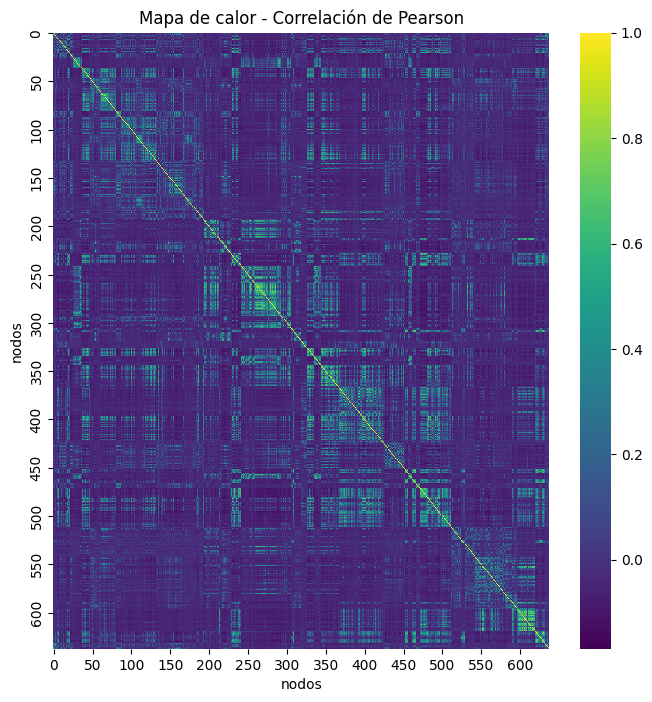

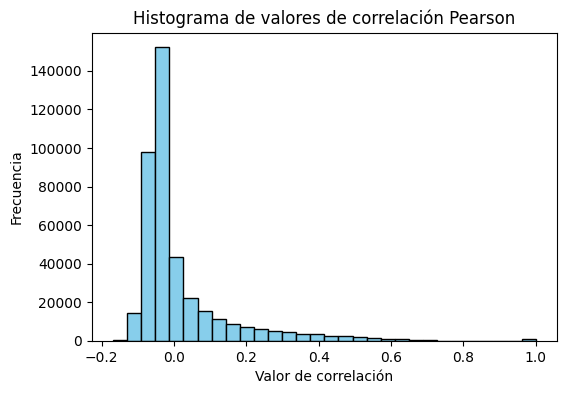

Percentil 25: -0.05461425173667007
Percentil 50 (mediana): -0.03199522769784653
Percentil 75: 0.021523216074782747


In [6]:
## Matriz de correlación de pearson
corr_pearson= df.corr().values
plt.figure(figsize=(8, 8))
ax = sns.heatmap(corr_pearson, annot=False, cmap="viridis",
                 xticklabels=50, yticklabels=50)
ax.set(xlabel="nodos", ylabel="nodos")
plt.title("Mapa de calor - Correlación de Pearson")
plt.show()

valores1 = corr_pearson.flatten()
plt.figure(figsize=(6, 4))
plt.hist(valores1, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Valor de correlación")
plt.ylabel("Frecuencia")
plt.title("Histograma de valores de correlación Pearson")
plt.show()

p25 = np.percentile(valores1, 25)
p50 = np.percentile(valores1, 50)
p75 = np.percentile(valores1, 75)

print("Percentil 25:", p25)
print("Percentil 50 (mediana):", p50)
print("Percentil 75:", p75)

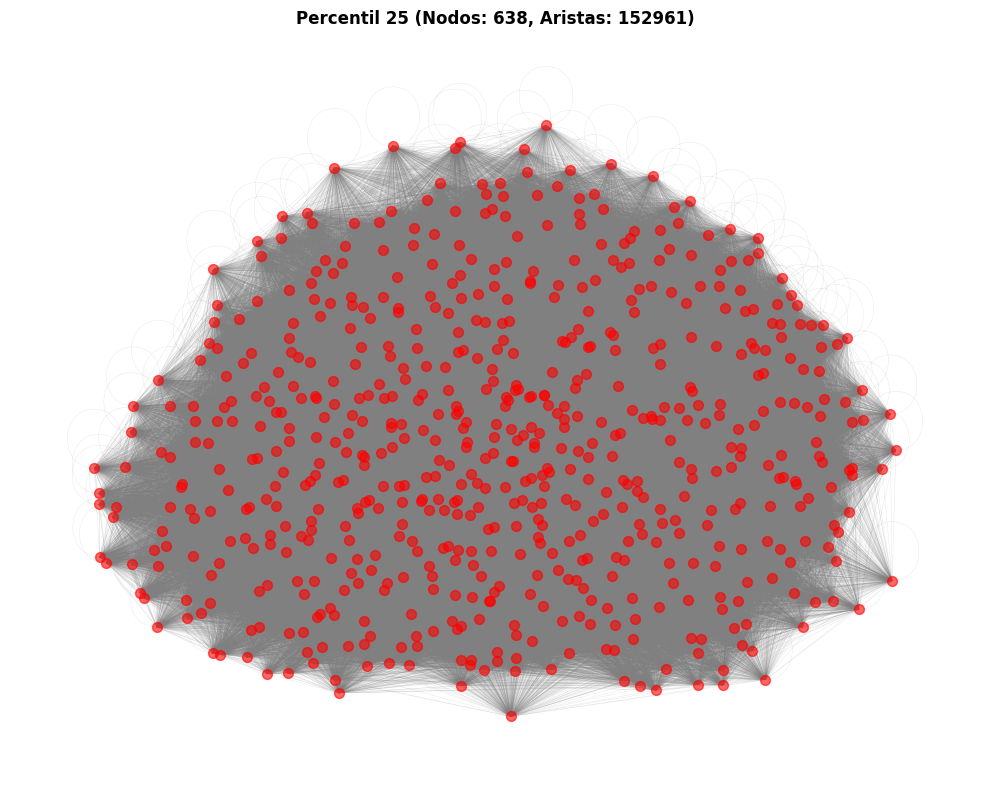

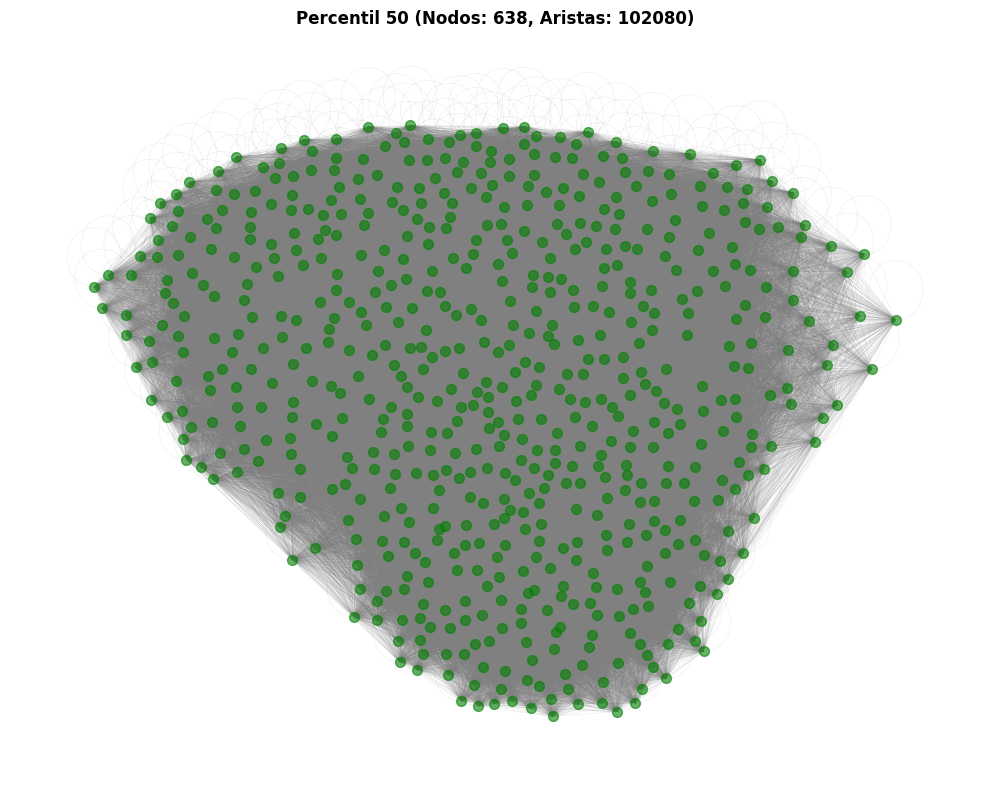

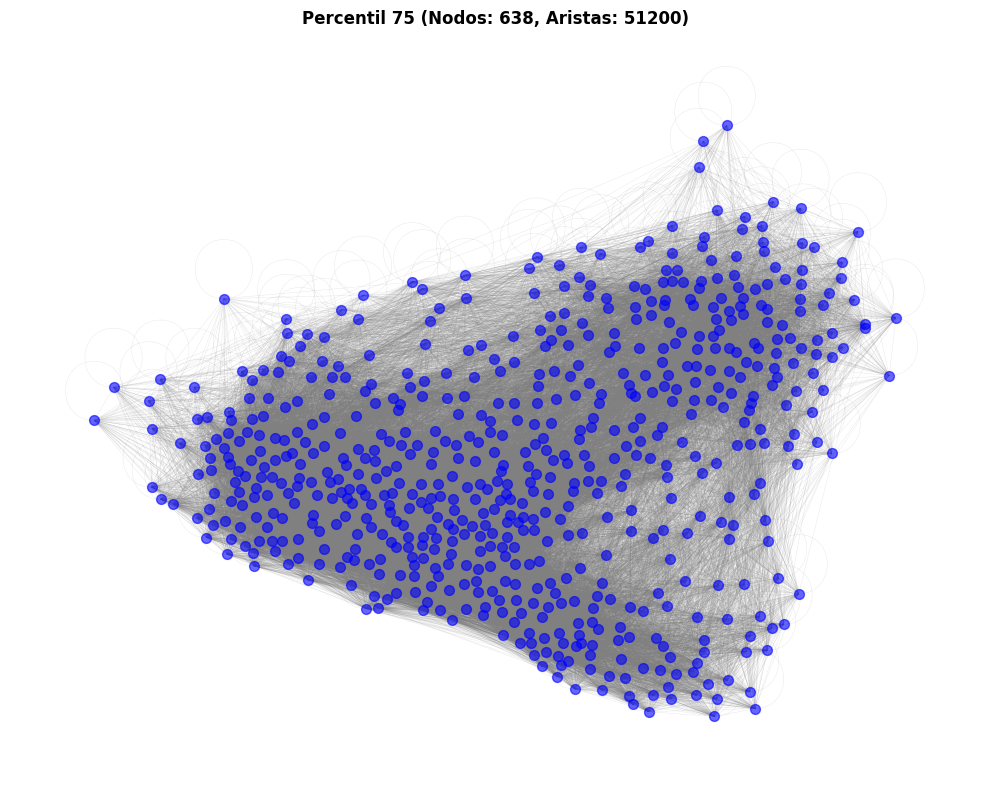

In [15]:
percentiles = [(p25, "Percentil 25", "red"),
               (p50, "Percentil 50", "green"),
               (p75, "Percentil 75", "blue")]

for per, titulo, color in percentiles:
    matriz_filtrada = np.where(corr_pearson >= per, 1, 0)
    
    G = nx.from_numpy_array(matriz_filtrada)
    pos = nx.spring_layout(G, k=0.5, iterations=50)  
    
    # Dibujar grafo
    plt.figure(figsize=(10, 8))
    
    nx.draw_networkx_nodes(G, pos, 
                          node_size=50, 
                          node_color=color, 
                          alpha=0.6)
    
    nx.draw_networkx_edges(G, pos, 
                          edge_color='gray', 
                          alpha=0.2,
                          width=0.3)
    
    plt.title(f"{titulo} (Nodos: {G.number_of_nodes()}, Aristas: {G.number_of_edges()})", 
              fontsize=12, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()


3. Utilizando el dataset de Coactivation_matrix.mat:
- Genere el grafo 3D
- Haga que el tamaño de nodos sea proporcional a su grado; es decir, q entre mayor sea su grado, mayor sea el tamaño del nodo ploteado
- Haga que el color de las aristas este relacionado al valor de la matriz de conectividad. Utilizar el map color Hot

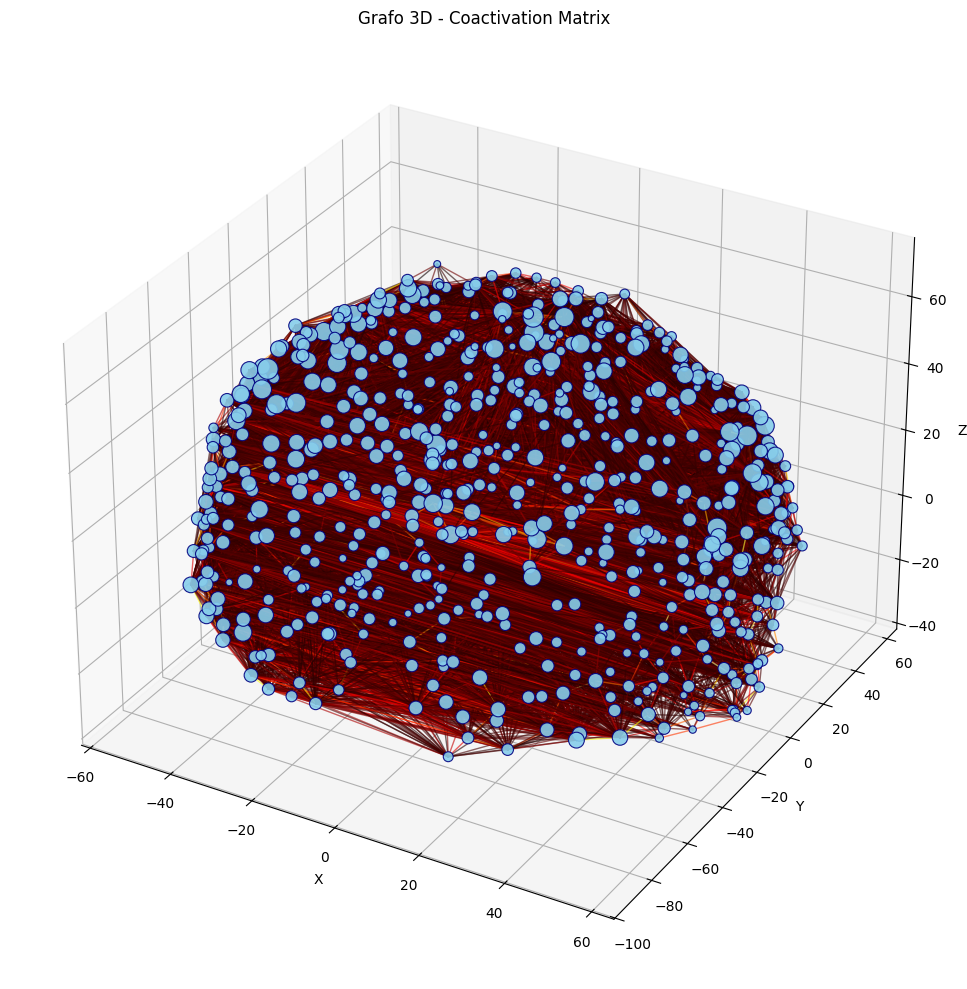

In [9]:
coords = datos['Coord']

G_3d = nx.from_pandas_adjacency(df)


degrees_3d = dict(G_3d.degree())
grado_array = np.array(list(degrees_3d.values()))
node_sizes = 20 + (grado_array - grado_array.min()) / (grado_array.max() - grado_array.min()) * 200

edge_weights = np.array([G_3d[u][v]['weight'] for u, v in G_3d.edges()])
if np.max(edge_weights) != np.min(edge_weights):
    norm_edge_weights = (edge_weights - np.min(edge_weights)) / (np.max(edge_weights) - np.min(edge_weights))
else:
    norm_edge_weights = np.zeros_like(edge_weights)

cmap = plt.get_cmap('hot')
edge_colors = cmap(norm_edge_weights)


fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Posiciones de nodos a partir de coords
node_xyz = np.array([coords[i] for i in G_3d.nodes()])
ax.scatter(node_xyz[:, 0], node_xyz[:, 1], node_xyz[:, 2],
           s=node_sizes, c='skyblue', alpha=0.9, edgecolors='navy', linewidths=0.8)

# Dibujar aristas
for i, (u, v) in enumerate(G_3d.edges()):
    x = [coords[u, 0], coords[v, 0]]
    y = [coords[u, 1], coords[v, 1]]
    z = [coords[u, 2], coords[v, 2]]
    ax.plot(x, y, z, color=edge_colors[i], alpha=0.6, linewidth=1.0)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Grafo 3D - Coactivation Matrix')

all_x = node_xyz[:, 0]
all_y = node_xyz[:, 1]
all_z = node_xyz[:, 2]
ax.set_xlim(all_x.min(), all_x.max())
ax.set_ylim(all_y.min(), all_y.max())
ax.set_zlim(all_z.min(), all_z.max())

ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

4. Utilizando el dataset de chb01_01.edf:
- Calcule el coeficiente de mundo pequeño
- Calcule las comunidades del grafo
- Calcule los hub
- Calcule la eficiencia global
- Calcule la eficiencia local
- Determine el grado de cada nodo

In [73]:
import mne
Datos_dos= r"C:\Users\Ana\Desktop\5to semestre\Modelos Computacionales\Neurociencias-2026-1\S03_datasets\EEG_practica\chb01_01.edf"
raw = mne.io.read_raw_edf(Datos_dos, preload=True)
data2 = raw.get_data()  
print(raw)
print(raw.info)
sfreq_target = 256           
fmin, fmax = 8, 13 
raw.resample(sfreq_target)
raw.filter(1., 45., fir_design='firwin')
data = raw.get_data()
ch_names = raw.info['ch_names']
n_channels=len(ch_names)

Extracting EDF parameters from C:\Users\Ana\Desktop\5to semestre\Modelos Computacionales\Neurociencias-2026-1\S03_datasets\EEG_practica\chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Ana\AppData\Local\Temp\ipykernel_27396\3227039373.py:3: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(Datos_dos, preload=True)


<RawEDF | chb01_01.edf, 23 x 921600 (3600.0 s), ~161.7 MiB, data loaded>
<Info | 8 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 23 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2076-11-06 11:42:54 UTC
 nchan: 23
 projs: []
 sfreq: 256.0 Hz
 subject_info: <subject_info | his_id: Surrogate>
>
Sampling frequency of the instance is already 256.0, returning unmodified.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 

In [76]:

conn_matrix = np.corrcoef(data)
threshold = np.percentile(conn_matrix, 50)
ad_matrix = np.where(conn_matrix >= threshold, 1, 0)



G = nx.from_numpy_array(ad_matrix)
C = nx.average_clustering(G)

try:
    L = nx.average_shortest_path_length(G)
except nx.NetworkXError:
    # usar la componente gigante conectada si el grafo no es conexo
    largest_cc = max(nx.connected_components(G), key=len)
    G_cc = G.subgraph(largest_cc)
    L = nx.average_shortest_path_length(G_cc)

G_random = nx.erdos_renyi_graph(n=G.number_of_nodes(), p=nx.density(G))
C_rand = nx.average_clustering(G_random)

try:
    L_rand = nx.average_shortest_path_length(G_random)
except nx.NetworkXError:
    largest_cc = max(nx.connected_components(G_random), key=len)
    G_rand_cc = G_random.subgraph(largest_cc)
    L_rand = nx.average_shortest_path_length(G_rand_cc)


sigma = (C / C_rand) / (L / L_rand)

print("Coeficiente de clustering (C):", C)
print("Longitud de camino promedio (L):", L)
print("coef mundo pequeño:", sigma)

Coeficiente de clustering (C): 0.6945530315095533
Longitud de camino promedio (L): 1.5021645021645023
coef mundo pequeño: 1.2485713241801586


In [77]:
## comunidad de grafos

from networkx.algorithms.community import greedy_modularity_communities

comunidades = greedy_modularity_communities(G)
print(f"Comunidades encontradas: {len(comunidades)}")
for i, c in enumerate(comunidades):
    print(f"Comunidad {i+1}: {list(c)}")

Comunidades encontradas: 5
Comunidad 1: [2, 3, 6, 7, 11, 14, 15, 17, 22]
Comunidad 2: [16, 1, 20, 5, 4, 8, 12]
Comunidad 3: [0, 10, 19]
Comunidad 4: [9, 13, 21]
Comunidad 5: [18]


In [78]:
## HUBS
grados = dict(G.degree())
grados_ordenados = sorted(grados.items(), key=lambda x: x[1], reverse=True)

print("Top 13 hubs por grado:")
for i, (nodo, grado) in enumerate(grados_ordenados[:13], start=1):
    print(f"{i}. Nodo {nodo}: {grado} conexiones")

Top 13 hubs por grado:
1. Nodo 6: 18 conexiones
2. Nodo 9: 18 conexiones
3. Nodo 16: 18 conexiones
4. Nodo 17: 18 conexiones
5. Nodo 5: 17 conexiones
6. Nodo 10: 17 conexiones
7. Nodo 13: 17 conexiones
8. Nodo 12: 15 conexiones
9. Nodo 0: 14 conexiones
10. Nodo 2: 14 conexiones
11. Nodo 3: 14 conexiones
12. Nodo 14: 14 conexiones
13. Nodo 22: 14 conexiones


In [79]:
## eficiencia global y local
E_global = nx.global_efficiency(G)
E_local = nx.local_efficiency(G)

print(f"Eficiencia global: {E_global:.3f}")
print(f"Eficiencia local promedio: {E_local:.3f}")

Eficiencia global: 0.692
Eficiencia local promedio: 0.849


In [80]:
## cada nodo
grados = dict(G.degree())

# Mostrar los grados de todos los nodos
for nodo, grado in grados.items():
    print(f"Nodo {nodo}: {grado} conexiones")

Nodo 0: 14 conexiones
Nodo 1: 11 conexiones
Nodo 2: 14 conexiones
Nodo 3: 14 conexiones
Nodo 4: 10 conexiones
Nodo 5: 17 conexiones
Nodo 6: 18 conexiones
Nodo 7: 9 conexiones
Nodo 8: 12 conexiones
Nodo 9: 18 conexiones
Nodo 10: 17 conexiones
Nodo 11: 13 conexiones
Nodo 12: 15 conexiones
Nodo 13: 17 conexiones
Nodo 14: 14 conexiones
Nodo 15: 9 conexiones
Nodo 16: 18 conexiones
Nodo 17: 18 conexiones
Nodo 18: 2 conexiones
Nodo 19: 4 conexiones
Nodo 20: 6 conexiones
Nodo 21: 4 conexiones
Nodo 22: 14 conexiones


5. Utilizando el dataset de chb01_01.edf:
- Genere el grafo 3D
- Haga que el tamaño de nodos sea proporcional a su grado; es decir, q entre mayor sea su grado, mayor sea el tamaño del nodo ploteado
- Haga que el color de las aristas este relacionado al valor de la matriz de conectividad. Utilizar el map color Hot

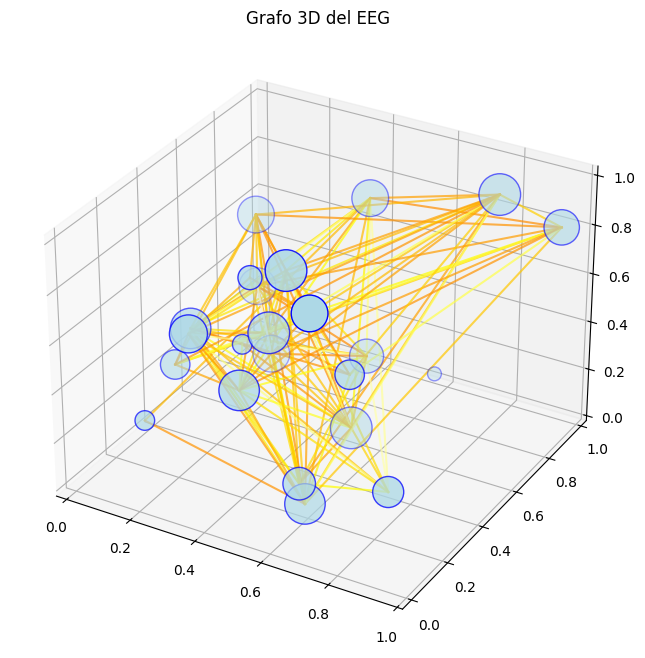

In [100]:

G = nx.from_numpy_array(ad_matrix)
# Tamaños de nodos según grado
grados = dict(G.degree())
tamanos_nodos = [grados[n]*50 for n in G.nodes()]


np.random.seed(42)
pos = {i: (np.random.rand(), np.random.rand(), np.random.rand()) for i in G.nodes()}


min_w, max_w = np.min(matriz_conect), np.max(matriz_conect)
norm_weights = (matriz_conect - min_w) / (max_w - min_w)  

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')


for i, j in G.edges():
    x = [pos[i][0], pos[j][0]]
    y = [pos[i][1], pos[j][1]]
    z = [pos[i][2], pos[j][2]]
    weight = norm_weights[i, j]
    ax.plot(x, y, z, c=cm.hot(weight), alpha=0.7)


xs = [pos[i][0] for i in G.nodes()]
ys = [pos[i][1] for i in G.nodes()]
zs = [pos[i][2] for i in G.nodes()]
ax.scatter(xs, ys, zs, s=tamanos_nodos, c='lightblue', edgecolors='b')

ax.set_title("Grafo 3D del EEG")
plt.show()